In [2]:
from Clarinet.melodyextraction.noBERT.song2graph import song2graph
from Clarinet.utils.convert import midi2text
from Clarinet.search import similarity
import os
import pandas as pd
from matplotlib import pyplot as plt
import random
from tqdm import tqdm

In [3]:
def evaluate(midi_file):
    actual=midi2text(midi_file)
    g=song2graph(midi_file)
    predicted="".join(g.melody())

    return(similarity(predicted,actual))

In [ ]:
def evaluateFolder(midi_folder,num_files=-1):
    files=sorted([f"{midi_folder}/{filename}" for filename in os.listdir(midi_folder)])
    if num_files==-1:
        num_files=len(files)
    df=pd.DataFrame(columns=["Filename","Score"])
    for i in tqdm(range(num_files)):
        file=files[i]
        score=evaluate(file)
        df=df.append({"Filename":file,"Score":score},ignore_index=True)
    return(df)

,Score
mean,0.505752
std,0.282552
min,0.002836
25%,0.279721
50%,0.509952
75%,0.748537
max,0.999595


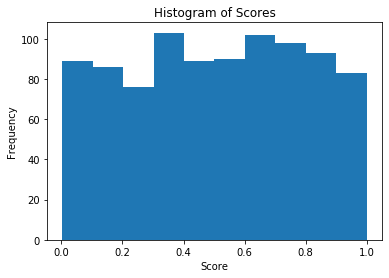

In [5]:
midi_folder=""
# df=evaluateFolder(midi_folder)
# Make a dummy df
df=pd.DataFrame(columns=["Filename","Score"])

for i in range(909):
    score=random.random()
    df=df.append({"Filename":f"{i}","Score":score},ignore_index=True)



# plot histogram of scores
plt.hist(df["Score"])
# label hist
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram of Scores")

df_stats=df.describe()
df_stats.drop(df_stats.index[0])